In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time
import os
#import tqdm
import random
import sys
import os
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("muted")
# 修改工作路径，使本.ipynb文件能够像在本文件夹根目录下一样导入其他模块
# Modify the working path so that this.ipynb file can import other modules like in the root directory
current_dir = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(current_dir, '..'))

In [17]:
# 超参数
num_epochs = 10  # 训练的轮数
learning_rate = 0.001 # 学习率
input_len = 500  # 输入长度
output_len = 50  # 输出长度
label_len = 8 # 标签长度
input_channels = 10  # 输入通道数
output_channels = 10  # 输出通道数
batch_size = 64  # 批大小
#device = 'cpu'  # 设备
device = 'cuda' if torch.cuda.is_available() else 'cpu'

data_paths=["E:\\科创优才\\实验数据\\毕设实验数据\\Testo20240509.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\testo20240511数据.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\烟气数据20240514.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\⁭烟气数据20240516.xlsx"]

var_names=['% O2', 'ppm CO', '% CO2', 'ppm NO', 'ppm NO2', '°C 烟温', 'ppm NOx', 'ppm SO2', '°C 环温', 'l/min 泵流量']

from models.RNN import RNN, LSTM, GRU
from models.CNN import CNN, TCN
from models.MLP import MLP
#from models.transformer import Transformer, iTransformer, PatchTST, Reformer, Informer
from models.Linear import LLinear, DLinear, NLinear
from models.stat import Identical, ExponentialMovingAverage, SVR
from gas_data_prediction.utils import FitHistory

# 实例化模型、损失函数、评估函数和优化器
MODEL = TCN(
    input_len=input_len, output_len=output_len, input_channels=input_channels, output_channels=output_channels,
    ).to(device)
loss_func = nn.MSELoss()
metric_func=nn.L1Loss()
optimizer = optim.Adam(MODEL.parameters(), lr=learning_rate)
history=FitHistory()
print('Model parameters: ', sum(p.numel() for p in MODEL.parameters()))

Model parameters:  679132


In [18]:
import gas_data_prediction.data_preprocessing as dp
X, Y, X_grouped, Y_grouped = dp.get_XY(data_paths, input_len, output_len, label_len=label_len, var_names=var_names)
train_loader, val_loader, test_loader = dp.get_XY_loaders(X, Y, batch_size=batch_size)

[8.01346211e+00 3.94858229e+02 4.57189353e+00 7.48603792e+00
 9.56869584e-01 1.70397855e+00 8.07038264e+00 8.03888710e+00
 1.33095537e+00 2.47787247e-02]
len(X_grouped): 4
len(Y_grouped): 4
X shape:  (634, 500, 10)
Y shape:  (634, 50, 10)
Train dataset size: X: (443, 500, 10); Y: (443, 50, 10)
Val dataset size: X: (63, 500, 10); Y: (63, 50, 10)
Test dataset size: X: (126, 500, 10); Y: (126, 50, 10)


  5%|▌         | 1/20 [00:00<00:10,  1.87it/s]

Epoch [ 1  /20], Time: 0.5358s, Loss: 0.0802, Metric: 0.1463, Val Loss: 0.2103, Val Metric: 0.2404


 10%|█         | 2/20 [00:01<00:09,  1.89it/s]

Epoch [ 2  /20], Time: 0.5254s, Loss: 0.0790, Metric: 0.1434, Val Loss: 0.2134, Val Metric: 0.2456


 15%|█▌        | 3/20 [00:01<00:08,  1.90it/s]

Epoch [ 3  /20], Time: 0.5200s, Loss: 0.0768, Metric: 0.1501, Val Loss: 0.2218, Val Metric: 0.2486


 20%|██        | 4/20 [00:02<00:08,  1.91it/s]

Epoch [ 4  /20], Time: 0.5211s, Loss: 0.0781, Metric: 0.1475, Val Loss: 0.2152, Val Metric: 0.2461


 25%|██▌       | 5/20 [00:02<00:07,  1.91it/s]

Epoch [ 5  /20], Time: 0.5208s, Loss: 0.0776, Metric: 0.1525, Val Loss: 0.2196, Val Metric: 0.2493


 30%|███       | 6/20 [00:03<00:07,  1.91it/s]

Epoch [ 6  /20], Time: 0.5204s, Loss: 0.0752, Metric: 0.1459, Val Loss: 0.2380, Val Metric: 0.2691


 35%|███▌      | 7/20 [00:03<00:06,  1.91it/s]

Epoch [ 7  /20], Time: 0.5230s, Loss: 0.0721, Metric: 0.1484, Val Loss: 0.2193, Val Metric: 0.2550


 40%|████      | 8/20 [00:04<00:06,  1.91it/s]

Epoch [ 8  /20], Time: 0.5240s, Loss: 0.0684, Metric: 0.1439, Val Loss: 0.2206, Val Metric: 0.2586


 45%|████▌     | 9/20 [00:04<00:05,  1.91it/s]

Epoch [ 9  /20], Time: 0.5227s, Loss: 0.0667, Metric: 0.1412, Val Loss: 0.2346, Val Metric: 0.2605


 50%|█████     | 10/20 [00:05<00:05,  1.88it/s]

Epoch [ 10 /20], Time: 0.5447s, Loss: 0.0652, Metric: 0.1411, Val Loss: 0.2340, Val Metric: 0.2641


 55%|█████▌    | 11/20 [00:05<00:04,  1.89it/s]

Epoch [ 11 /20], Time: 0.5213s, Loss: 0.0647, Metric: 0.1439, Val Loss: 0.2289, Val Metric: 0.2655


 60%|██████    | 12/20 [00:06<00:04,  1.90it/s]

Epoch [ 12 /20], Time: 0.5208s, Loss: 0.0621, Metric: 0.1434, Val Loss: 0.2320, Val Metric: 0.2661


 65%|██████▌   | 13/20 [00:06<00:03,  1.91it/s]

Epoch [ 13 /20], Time: 0.5197s, Loss: 0.0596, Metric: 0.1398, Val Loss: 0.2431, Val Metric: 0.2722


 70%|███████   | 14/20 [00:07<00:03,  1.91it/s]

Epoch [ 14 /20], Time: 0.5240s, Loss: 0.0574, Metric: 0.1377, Val Loss: 0.2436, Val Metric: 0.2733


 75%|███████▌  | 15/20 [00:07<00:02,  1.91it/s]

Epoch [ 15 /20], Time: 0.5228s, Loss: 0.0554, Metric: 0.1347, Val Loss: 0.2352, Val Metric: 0.2722


 80%|████████  | 16/20 [00:08<00:02,  1.90it/s]

Epoch [ 16 /20], Time: 0.5254s, Loss: 0.0545, Metric: 0.1375, Val Loss: 0.2443, Val Metric: 0.2809


 85%|████████▌ | 17/20 [00:08<00:01,  1.90it/s]

Epoch [ 17 /20], Time: 0.5239s, Loss: 0.0529, Metric: 0.1354, Val Loss: 0.2473, Val Metric: 0.2799


 90%|█████████ | 18/20 [00:09<00:01,  1.91it/s]

Epoch [ 18 /20], Time: 0.5213s, Loss: 0.0511, Metric: 0.1327, Val Loss: 0.2429, Val Metric: 0.2797


 95%|█████████▌| 19/20 [00:09<00:00,  1.91it/s]

Epoch [ 19 /20], Time: 0.5215s, Loss: 0.0508, Metric: 0.1369, Val Loss: 0.2437, Val Metric: 0.2822


100%|██████████| 20/20 [00:10<00:00,  1.90it/s]

Epoch [ 20 /20], Time: 0.5215s, Loss: 0.0499, Metric: 0.1341, Val Loss: 0.2534, Val Metric: 0.2862
Total Time: 10.4797s


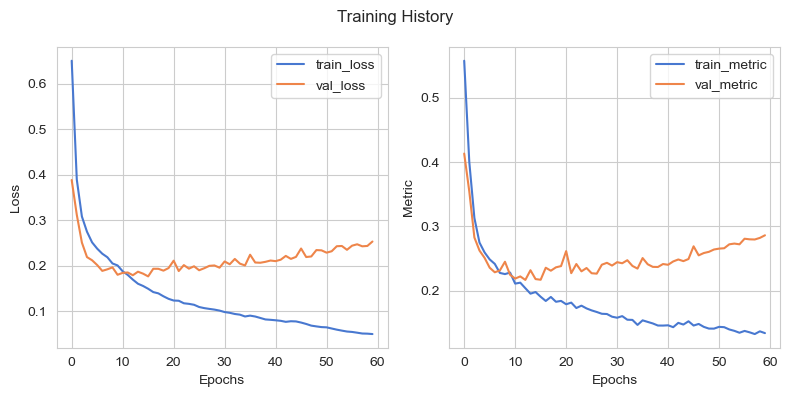

Number of epochs:  60
Training time:     31.5948s
Training loss:     0.0499
Training metric:   0.1341
Validation loss:   0.2534
Validation metric: 0.2862


100%|██████████| 2/2 [00:00<00:00, 39.51it/s]

Loss on test set:  0.7395017364668468


In [21]:
from utils import train, plot_predictions
# 训练模型
history.update(
            *train(MODEL, train_loader, val_loader, optimizer,
                loss_func=nn.MSELoss(),
                metric_func=nn.L1Loss(),
                num_epochs=20,
                device=device,
                verbose=1)
            )
history.plot()
history.summary()
print("Loss on test set: ", MODEL.evaluate(test_loader,device=device))

C:\Users\24021\AppData\Local\Temp\ipykernel_22500\3287305630.py:58: UserWarning: Glyph 28895 (\N{CJK UNIFIED IDEOGRAPH-70DF}) missing from font(s) Arial.
  plt.tight_layout(h_pad=2)
C:\Users\24021\AppData\Local\Temp\ipykernel_22500\3287305630.py:58: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) Arial.
  plt.tight_layout(h_pad=2)
C:\Users\24021\AppData\Local\Temp\ipykernel_22500\3287305630.py:58: UserWarning: Glyph 29615 (\N{CJK UNIFIED IDEOGRAPH-73AF}) missing from font(s) Arial.
  plt.tight_layout(h_pad=2)
C:\Users\24021\AppData\Local\Temp\ipykernel_22500\3287305630.py:58: UserWarning: Glyph 27893 (\N{CJK UNIFIED IDEOGRAPH-6CF5}) missing from font(s) Arial.
  plt.tight_layout(h_pad=2)
C:\Users\24021\AppData\Local\Temp\ipykernel_22500\3287305630.py:58: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) Arial.
  plt.tight_layout(h_pad=2)
C:\Users\24021\AppData\Local\Temp\ipykernel_22500\3287305630.py:58: UserWarning: Glyph 373

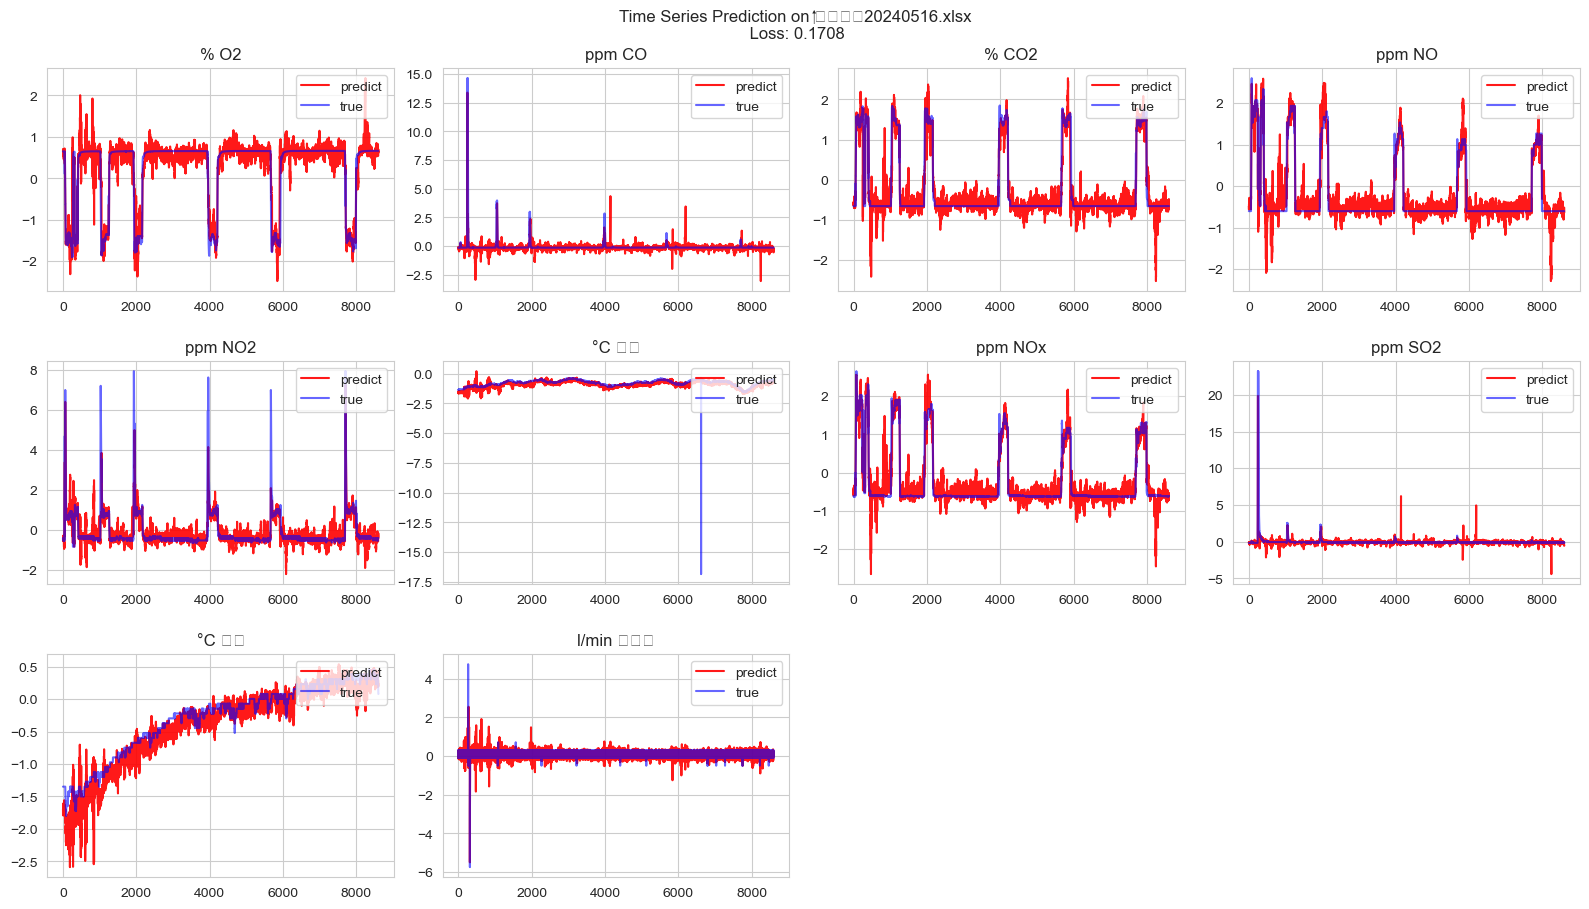

In [22]:
def plot_predictions(MODEL, X_grouped, Y_grouped, var_names, mat_paths,
                    iii=0,
                    figsize=(16,12),
                    device='cpu'
                    ):
    '''
    Plot the predictions of the model on a given mat file.
    Parameters:
    - MODEL: torch.nn.Module, the trained model
    - X_grouped: list of (list of (input_length,len(var_names)) numpy array), the input data grouped by mat file
    - Y_grouped: list of (list of (output_length,len(var_names)) numpy array), the output data grouped by mat file
    - var_names: list of strings, the names of the variables
    - mat_paths: list of strings, the paths of the mat files
    - iii: int, the index of the mat file to be plotted
    - figsize: tuple of int, the size of the figure
    Return:
    - None
    '''
    # iii=43 # 要在某个mat文件上做预测,选中mat编号(iii)（建议落在测试集对应的编号范围内）

    X_to_predict=[] # 作为输入的真实数据
    Y_to_predict=[] # 待预测的真实数据

    for i in range(len(X_grouped[iii])):
        X_to_predict.append(X_grouped[iii][i])
    X_to_predict=np.array(X_to_predict) # X_to_predict: numpy array. Shape: (num_batches, input_len, input_channels)

    for i in range(len(Y_grouped[iii])):
        Y_to_predict.append(Y_grouped[iii][i])
    Y_to_predict=np.array(Y_to_predict) # Y_to_predict: numpy array. Shape: (num_batches, output_len, output_channels):

    if hasattr(MODEL, 'label_len') and MODEL.label_len > 0: # 如果模型含有label_len属性，说明前向传播过程需要解码器输入
        label_len=MODEL.label_len
        output_len=MODEL.output_len
        pred_len=output_len-label_len
        dec_inp = torch.zeros_like(torch.Tensor(Y_to_predict[:, -pred_len:, :])).float().to(device)
        dec_inp = torch.cat([torch.Tensor(Y_to_predict[:, :label_len, :]).to(device), dec_inp], dim=1).float().to(device)
        Y_to_predict=Y_to_predict[:, -pred_len:, :] # 取待预测时间范围内的数据
        Y_predicted=MODEL(torch.Tensor(X_to_predict).to(device), dec_inp).cpu().detach().numpy() # 根据X_to_predict预测到的数据
    else: # 如果模型不含有label_len属性，说明前向传播过程不需要解码器输入
        Y_predicted=MODEL(torch.Tensor(X_to_predict).to(device)).cpu().detach().numpy() # 根据X_to_predict预测到的数据

    output_channels=Y_predicted.shape[2]
    Y_predicted_flatten=Y_predicted.reshape(-1,output_channels)
    Y_to_predict_flatten=Y_to_predict.reshape(-1,output_channels)
    loss=np.mean((Y_predicted_flatten-Y_to_predict_flatten)**2) # 计算预测误差

    plt.figure(figsize=figsize) # figsize is specified in the function parameter
    import os
    plt.suptitle('Time Series Prediction on {}\n Loss: {:.4f}'.format(os.path.basename(mat_paths[iii]), loss))
    for var_name in var_names:
        var_idx=var_names.index(var_name)
        plt.subplot(4, 4, var_idx+1)
        plt.plot(Y_predicted_flatten[:,var_idx], alpha=0.9, c='red')
        plt.plot(Y_to_predict_flatten[:,var_idx], alpha=0.6, c='blue')
        plt.legend(['predict', 'true'], loc='upper right')
        plt.title(var_name)
    plt.tight_layout(h_pad=2)
    #plt.savefig("", bbox_inches='tight')
    plt.show()

plot_predictions(MODEL, X_grouped, Y_grouped, var_names, data_paths,
                    iii=3,
                    figsize=(16,12),
                    device='cuda'
                    )